<a href="https://colab.research.google.com/github/daledalecious/Plate-Number-Detection-Project-/blob/main/Plate_Number_Recognition_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plate Recognition using OCR

#### Steps

1. Install or import all necessary dependencies.
2. Read in image, Grayscale and Blur
3. Apply filter and find the edges for localization
4. Find Contours and Apply Mask
5. Use easy OCR to read the text
6. Render the result

### 1. Install or import all necessary dependencies.

In [ ]:
!pip install easyocr
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 KB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 13.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.68
    Uninstalling opencv-python-headless-4.7.0.68:
      Successfully uninstalled opencv-python-headless-4.7.0.68
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
import imutils
import easyocr

In [ ]:
import matplotlib.image as mpimg



In [ ]:
from google.colab import files
from IPython import display


In [ ]:
uploaded = files.upload()

Saving car1.jpg to car1.jpg


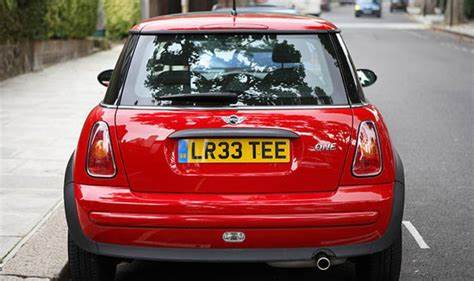

In [ ]:
display.Image("car1.jpg")


### 2. Read in image, Grayscale and Blur

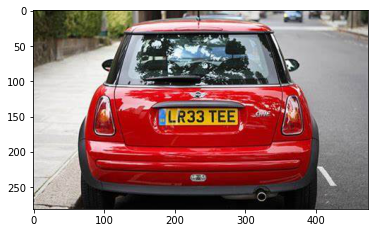

In [ ]:
img = mpimg.imread('car1.jpg')
plt.imshow(img)
plt.show()

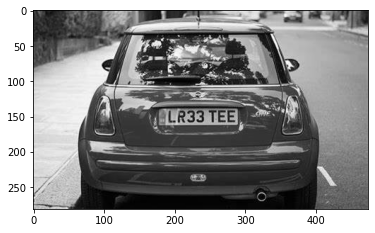

In [ ]:
img = cv2.imread('car1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

### 3. Apply filter and find the edges for localization

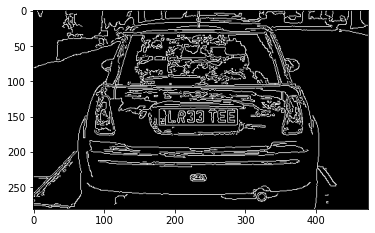

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edge = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB))

### 4. Find Contours and Apply Mask

In [ ]:
keypoints = cv2.findContours(edge.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour = imutils.grab_contours(keypoints)
contour = sorted(contour, key = cv2.contourArea, reverse=True)[:10]

In [ ]:
location = None
for contours in contour:
    approx = cv2.approxPolyDP(contours, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [ ]:
location 

array([[[178, 140]],

       [[178, 162]],

       [[289, 161]],

       [[288, 139]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

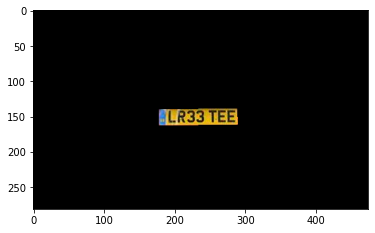

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x), np.min(y))
(x2,y2) = (np.max(x), np.max(y))
cropped_img = gray[x1:x2+1, y1:y2+1]

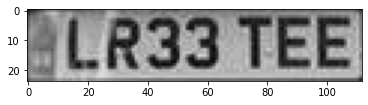

In [ ]:
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))

### 5. Use easy OCR to read the text

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_img)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[8, 0], [112, 0], [112, 24], [8, 24]], 'Lr33 TEE', 0.6020009947100435)]

### 6 Render the result

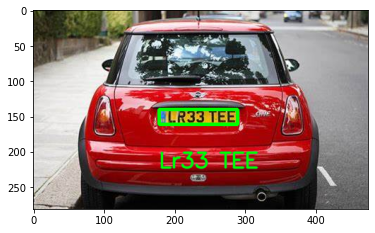

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))